Packages & Data Load

In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler 
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

pd.set_option('display.max_columns',None)
warnings.filterwarnings("ignore")

df = pd.read_csv('C:\\Users\\alexr\\Desktop\\   \\Work\\Data Science\\In Use\\Marketing Data\\Merged.csv')

First Impression

In [219]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n_Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,ID,Year_Birth,Dt_Customer
0,4428,0,1,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,3,11,0,51,2426,0,1,0,0,0,0,0,1,0,0,38,-283,0,10311,1969,2013-10-05 00:00:00.0000000
1,21474,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,0,3,11,1,31,2241,0,0,1,0,0,0,0,1,0,0,57,23,1,5371,1989,2014-04-08 00:00:00.0000000
2,26872,0,0,0,3,10,8,3,16,32,1,1,1,2,6,0,0,0,0,0,0,3,11,0,39,2415,0,1,0,0,0,0,0,1,0,0,40,8,0,2964,1981,2013-10-16 00:00:00.0000000
3,30523,2,1,0,5,0,3,0,0,5,1,1,0,2,7,0,0,0,0,0,0,3,11,0,62,2522,0,0,1,0,0,0,0,0,1,0,8,3,0,2795,1958,2013-07-01 00:00:00.0000000
4,32173,0,1,0,18,0,2,0,0,2,1,1,0,3,4,0,0,0,0,0,0,3,11,0,62,2491,1,0,0,0,0,0,0,0,0,1,20,18,0,10175,1958,2013-08-01 00:00:00.0000000


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Income                2002 non-null   int64 
 1   Kidhome               2002 non-null   int64 
 2   Teenhome              2002 non-null   int64 
 3   Recency               2002 non-null   int64 
 4   MntWines              2002 non-null   int64 
 5   MntFruits             2002 non-null   int64 
 6   MntMeatProducts       2002 non-null   int64 
 7   MntFishProducts       2002 non-null   int64 
 8   MntSweetProducts      2002 non-null   int64 
 9   MntGoldProds          2002 non-null   int64 
 10  NumDealsPurchases     2002 non-null   int64 
 11  NumWebPurchases       2002 non-null   int64 
 12  NumCatalogPurchases   2002 non-null   int64 
 13  NumStorePurchases     2002 non-null   int64 
 14  NumWebVisitsMonth     2002 non-null   int64 
 15  AcceptedCmp3          2002 non-null   

Data Clean

In [221]:
df.drop(columns=['Z_CostContact','Z_Revenue'], inplace=True)

In [222]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Month'] = df['Dt_Customer'].dt.month
df['Year'] = df['Dt_Customer'].dt.year

In [223]:
convert = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
           'Complain', 'Response', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together',
           'marital_Widow', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'education_2n_Cycle'
           ]
df[convert] = df[convert].astype(bool)

convert = ['ID','AcceptedCmpOverall','Kidhome','Teenhome']
df[convert] = df[convert].astype(object)

convert = ['Month','Year','AcceptedCmpOverall']
df[convert] = df[convert].astype('int64')

In [224]:
num_df = df.select_dtypes(include = ['float','int64'])
cat_df = df.select_dtypes(include=['bool','object'])
cat_df.drop(columns=['ID'], inplace=True)


Overview

In [225]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2002.0,51642.016983,20770.423997,1730.0,35352.00,51411.5,68307.25,113734.0
Recency,2002.0,49.003996,28.939942,0.0,24.00,49.0,74.00,99.0
MntWines,2002.0,305.793706,336.971214,0.0,24.00,178.0,506.50,1493.0
MntFruits,2002.0,26.451548,39.844737,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2002.0,165.853147,219.292567,0.0,16.00,68.0,230.00,1725.0
MntFishProducts,2002.0,37.642358,54.826718,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2002.0,27.312687,41.559446,0.0,1.00,8.0,34.00,262.0
MntGoldProds,2002.0,43.737762,51.503237,0.0,9.00,24.0,56.00,321.0
NumDealsPurchases,2002.0,2.321179,1.884003,0.0,1.00,2.0,3.00,15.0
NumWebPurchases,2002.0,4.116384,2.755022,0.0,2.00,4.0,6.00,27.0


In [226]:
cat_df.describe().T

,count,unique,top,freq
Kidhome,2002,3,0,1156
Teenhome,2002,3,0,1035
AcceptedCmp3,2002,2,False,1854
AcceptedCmp4,2002,2,False,1850
AcceptedCmp5,2002,2,False,1857
AcceptedCmp1,2002,2,False,1870
AcceptedCmp2,2002,2,False,1976
Complain,2002,2,False,1983
Response,2002,2,False,1704
marital_Divorced,2002,2,False,1791


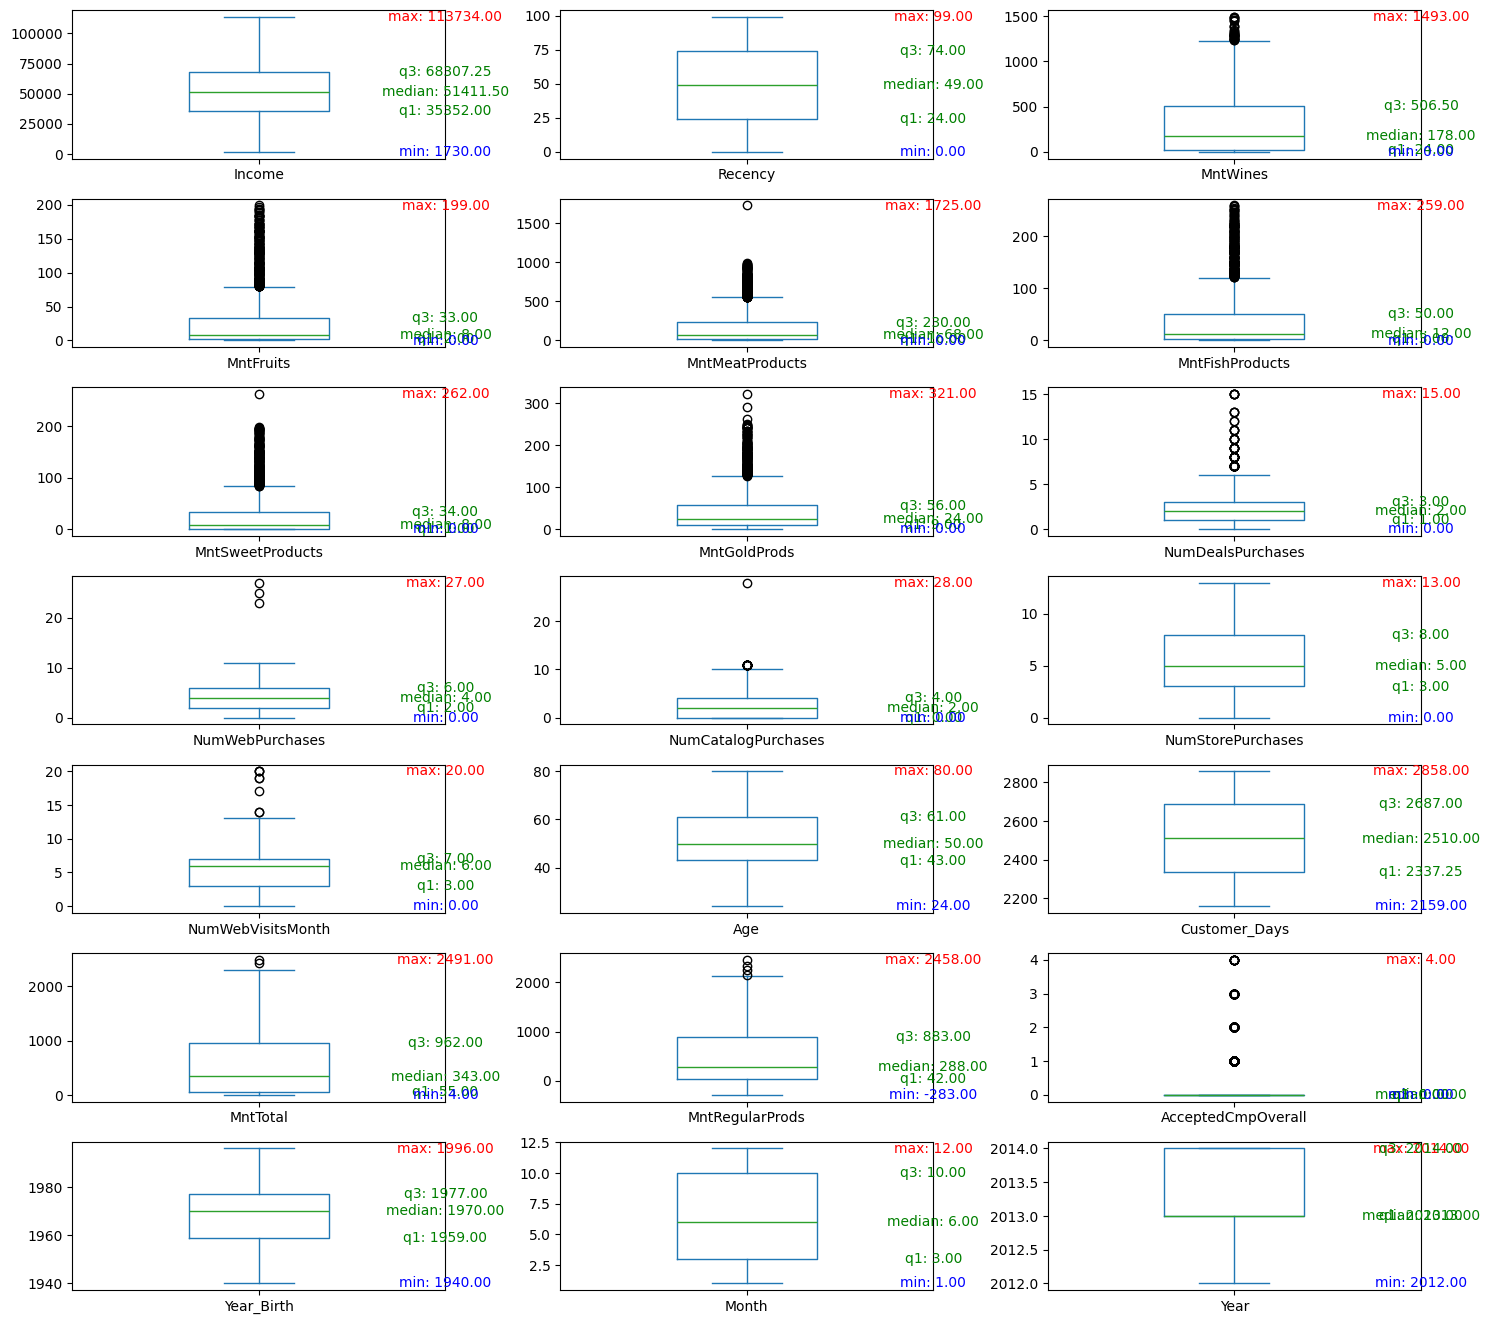

In [227]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the axes to a 1D array

num_df.plot(kind='box', subplots=True, layout=(8, 3), ax=axes[:num_df.shape[1]], figsize=(15, 25))

for i, ax in enumerate(axes[:num_df.shape[1]]):  # Loop through only the necessary axes
    col = num_df.columns[i]  # Get the column name
    med_val = num_df[col].median()  # Calculate median
    min_val = num_df[col].min()     # Minimum
    max_val = num_df[col].max()     # Maximum
    q1_val = num_df[col].quantile(0.25)  # First Quartile (Q1)
    q3_val = num_df[col].quantile(0.75)  # Third Quartile (Q3)
    
    ax.text(1.2, max_val, f'max: {max_val:.2f}'
            ,horizontalalignment='center'
            ,verticalalignment='center'
            ,color='red'
            ,fontsize=10
            )
    
    ax.text(1.2, q3_val, f'q3: {q3_val:.2f}'
            ,horizontalalignment='center'
            ,verticalalignment='center'
            ,color='green'
            ,fontsize=10
            )
    
    ax.text(1.2, med_val, f'median: {med_val:.2f}'
            ,horizontalalignment='center'
            ,verticalalignment='center'
            ,color='green'
            ,fontsize=10
            )
    
    ax.text(1.2, q1_val, f'q1: {q1_val:.2f}'
            ,horizontalalignment='center'
            ,verticalalignment='center'
            ,color='green'
            ,fontsize=10
            )
    
    ax.text(1.2, min_val, f'min: {min_val:.2f}'
            ,horizontalalignment='center'
            ,verticalalignment='center'
            ,color='blue'
            ,fontsize=10
            )

    # Adjust x-axis limits for the text placement
    ax.set_xlim(0.8, 1.2)

# Hide any unused subplot (in case we have extra subplots due to grid size)
for j in range(num_df.shape[1], len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


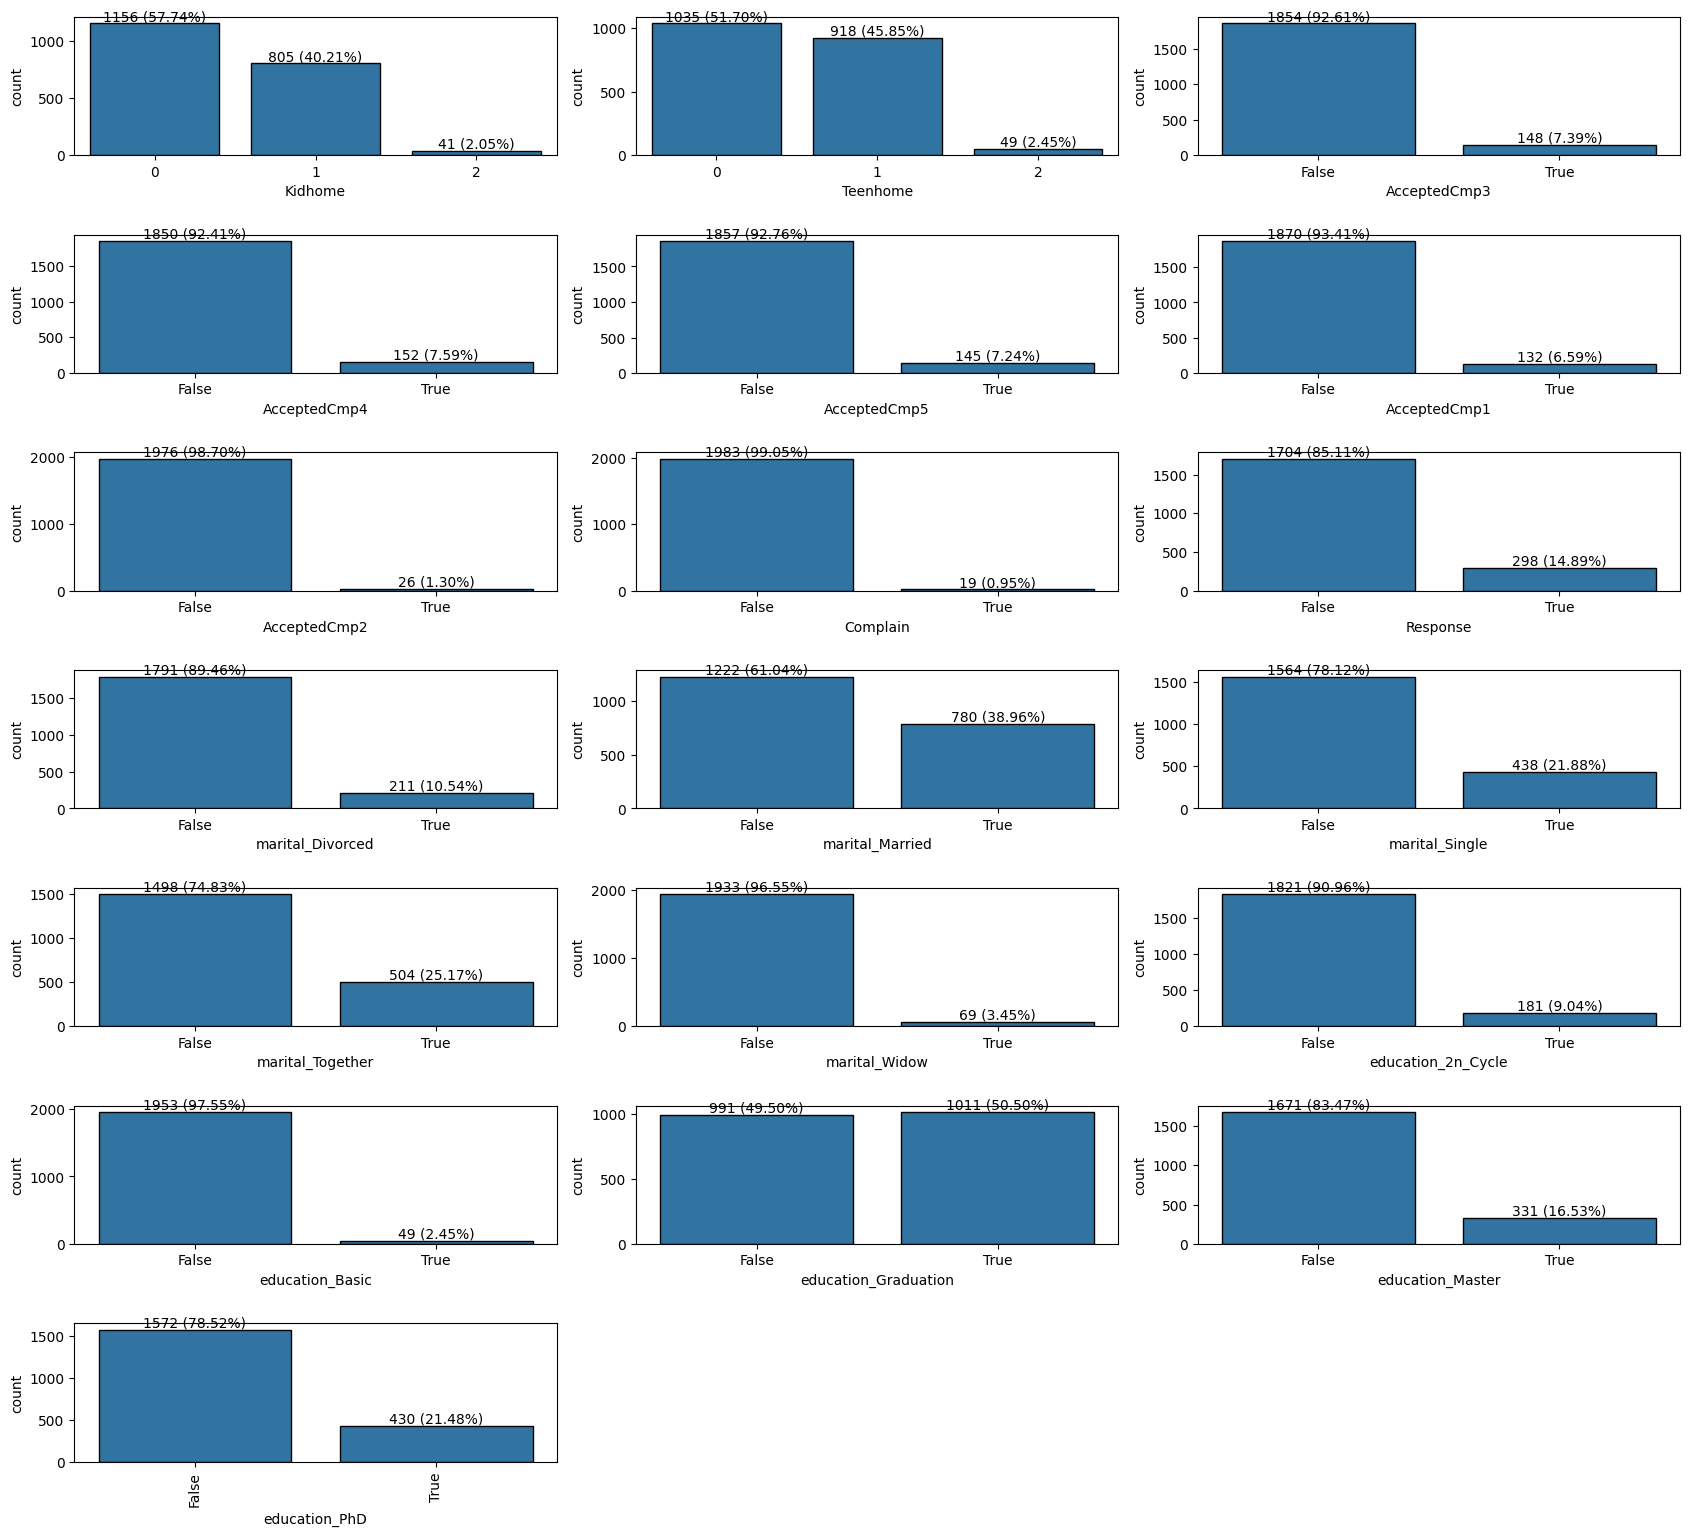

In [228]:
#ALL visualize filtered categorical data
plt.figure(figsize = (17,17))

for i in enumerate(cat_df):
    plt.subplot(8,3,i[0]+1)
    #use hue to filter with one other category
    ax = sns.countplot(x=i[1]
                  ,data = cat_df
                  ,edgecolor='black'
                  )    

    for p in ax.patches:
        total = len(cat_df[i[1]])
        height = p.get_height()

        ax.text(p.get_x() + p.get_width() / 2, 
                p.get_height(),
                f'{height:.0f} ({100 * height / total:.2f}%)' 

                ,ha='center'
                ,va='bottom'
                ,fontsize=10
                ,color='black'
                )
        
plt.xticks(rotation = 90)
#adjust layout
plt.tight_layout()
#Show the plots
plt.show()

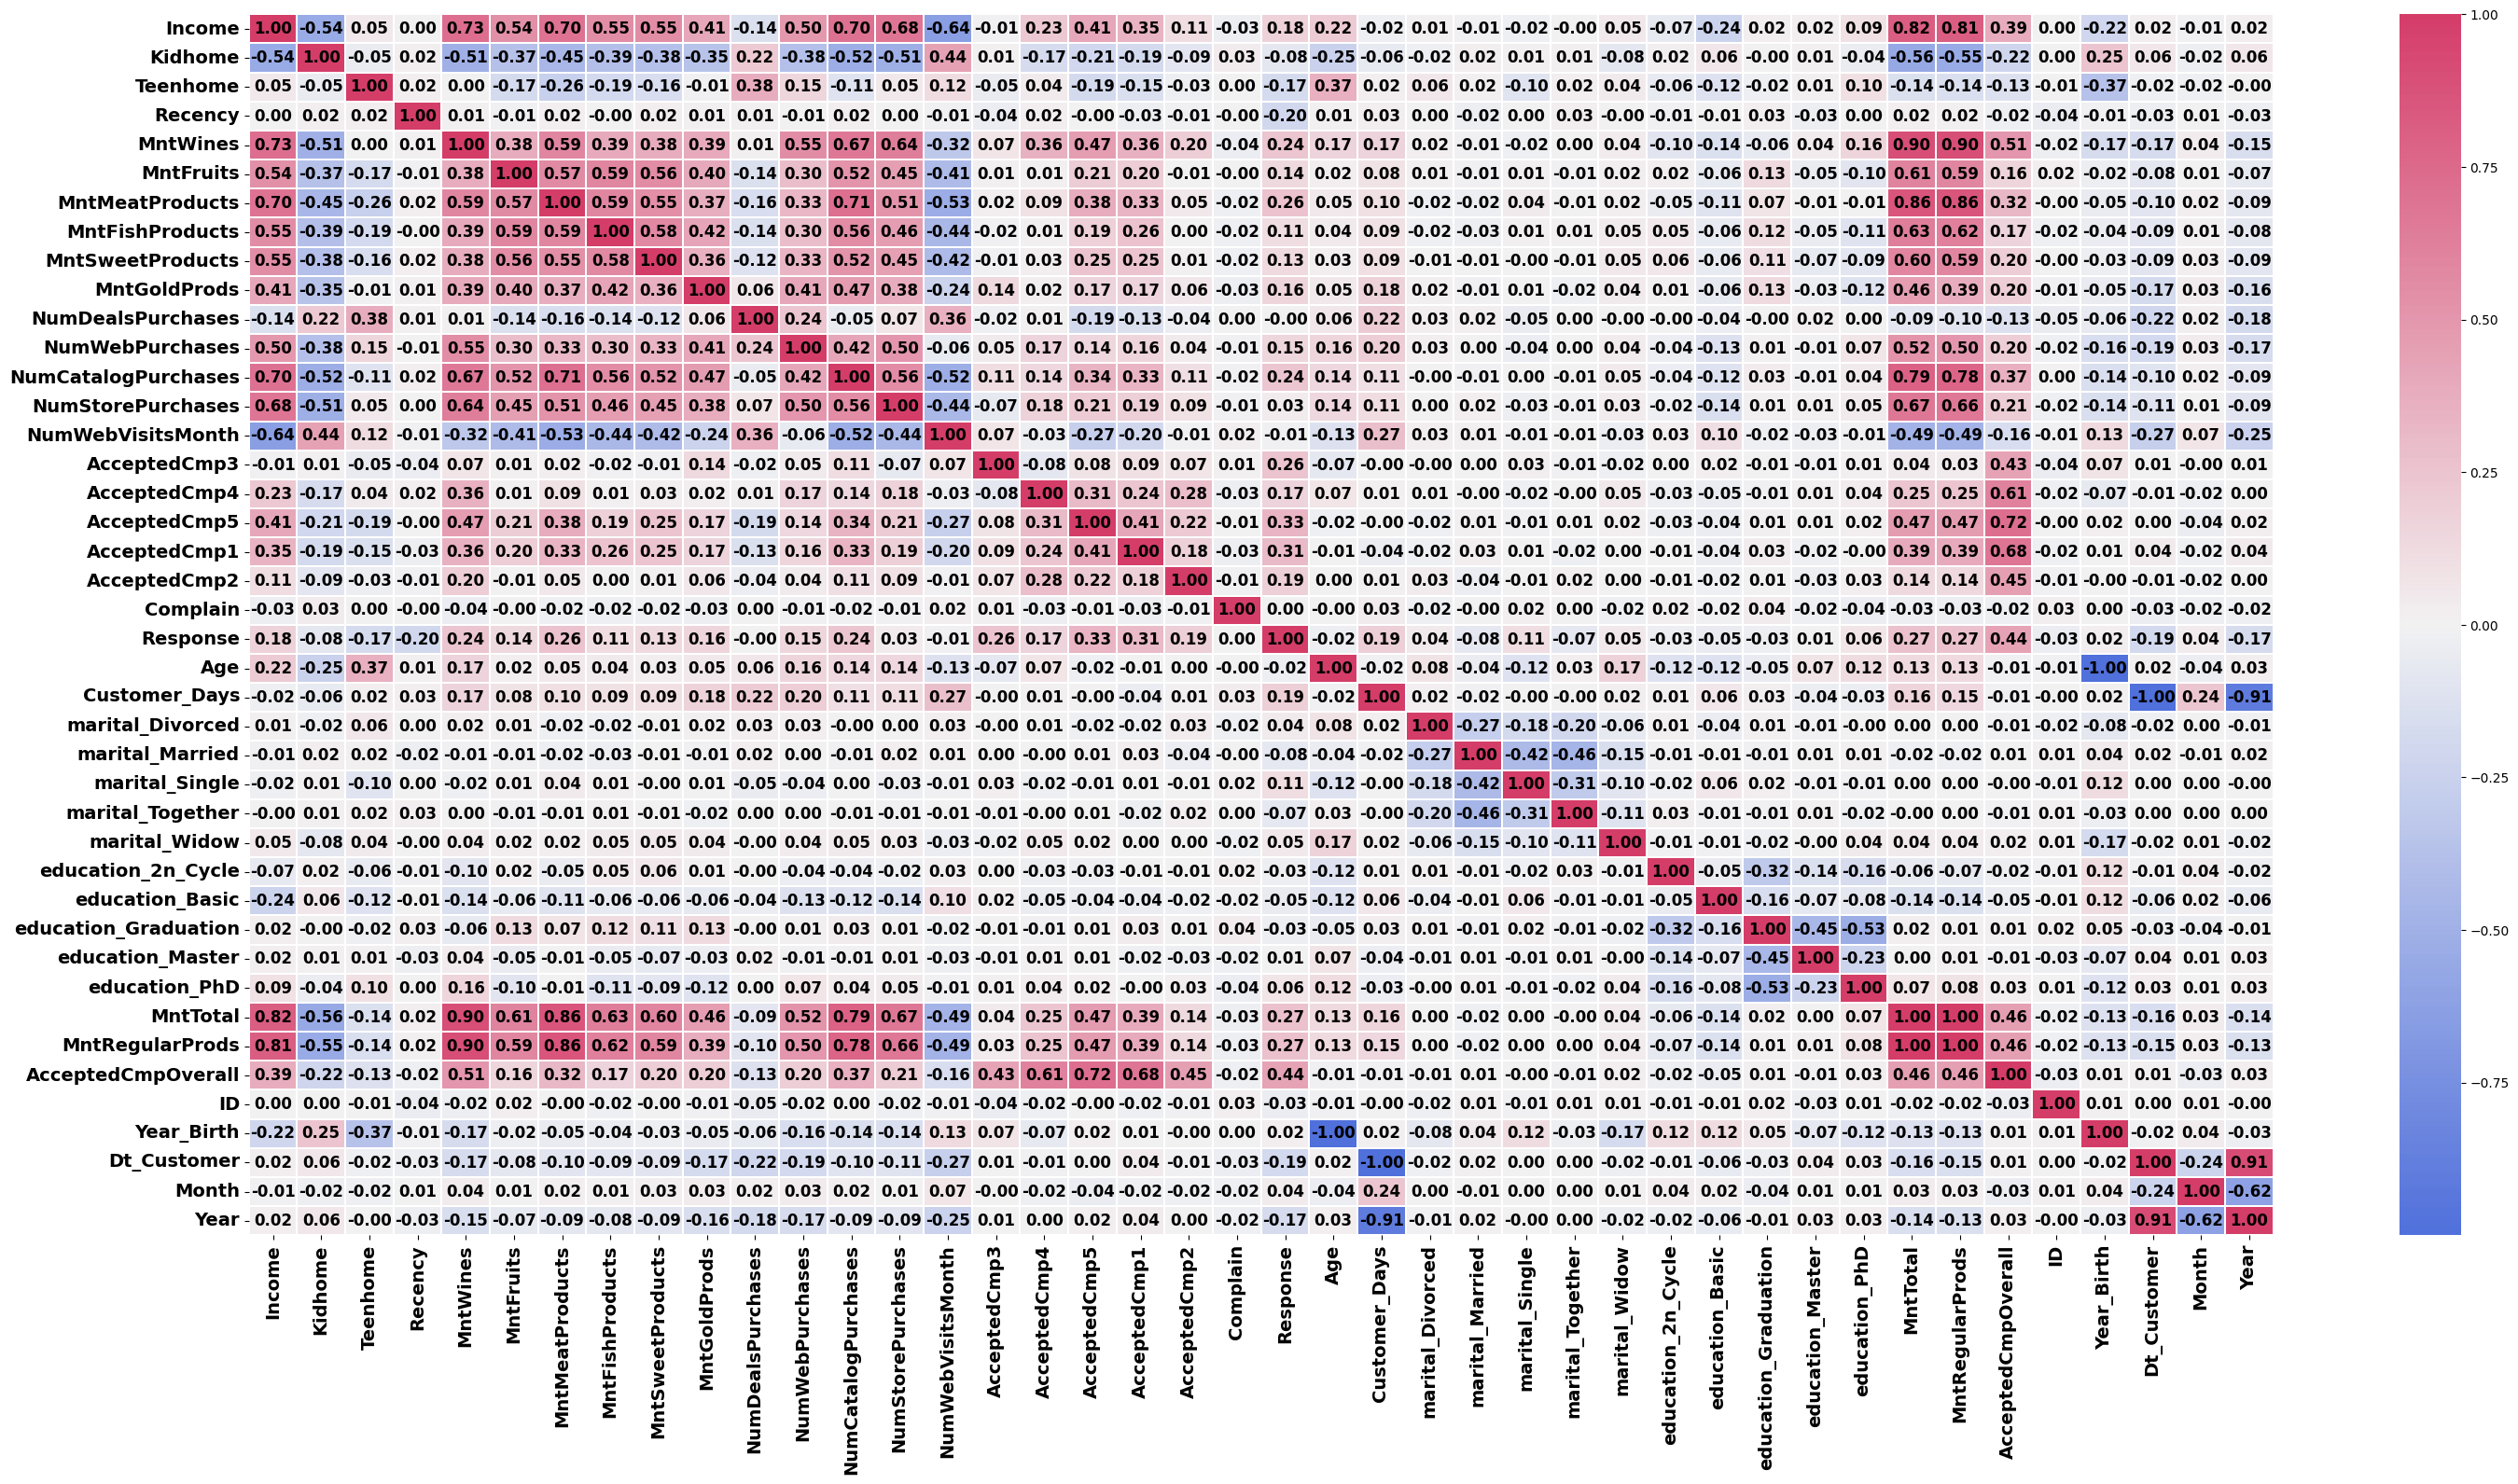

In [229]:
#Heatmap for correlation

# Initialize LabelEncoder object
label_encode = LabelEncoder()

# Create a copy of the DataFrame
df2 = df.copy()

# Iterate over columns in DataFrame
for i in df2.columns:
    # If column type is 'object', encode it using LabelEncoder
    if df2[i].dtype == 'object':
        df2[i] = LabelEncoder().fit_transform(df2[i])

# Plot correlation heatmap of modified DataFrame
plt.figure(figsize=(35, 17), facecolor='none')
sns.heatmap(
    df2.corr(),
    cmap=sns.diverging_palette(260, 360, as_cmap=True),
    annot=True,
    linewidths=0.2,
    annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'},
    fmt='.2f',
)
plt.xticks(fontsize=14, weight='bold', rotation=90)
plt.yticks(fontsize=14, weight='bold')
plt.show()

Demographic Trait

In [230]:
def get_education_status(row):
    if row['education_Basic'] == 1:
        return 'Basic'
    elif row['education_Graduation'] == 1:
        return 'Graduation'
    elif row['education_Master'] == 1:
        return 'Master'
    elif row['education_PhD'] == 1:
        return 'PhD'
    elif row['education_2n_Cycle'] == 1:
        return '2n_Cycle'
    else:
        return 'Unknown'
df['Education'] = df.apply(get_education_status, axis=1)

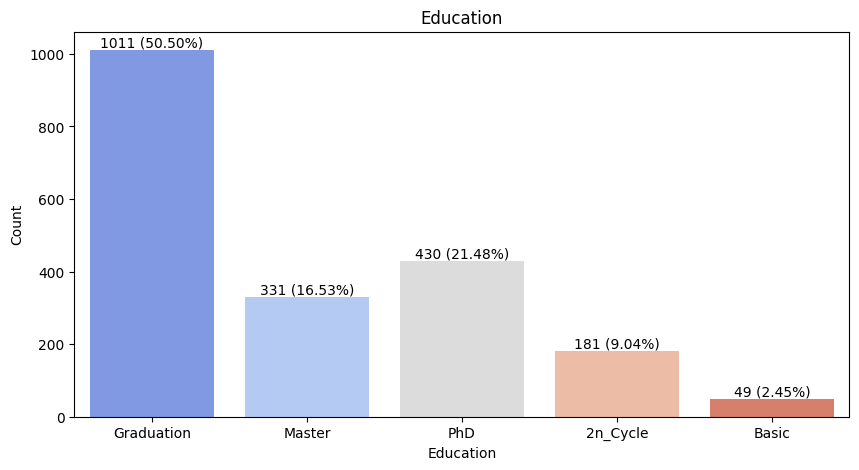

In [231]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Education', data=df, palette='coolwarm')

total = len(df)

# Add percentage labels to each bar
for p in ax.patches:
    count = p.get_height() 
    percentage = (count / total) * 100  
    
    # Annotate the percentage label on each bar
    ax.text(p.get_x() + p.get_width() / 2, count + 0.5, f'{count:.0f} ({percentage:.2f}%)', 
            ha='center', va='bottom')

        
plt.title('Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

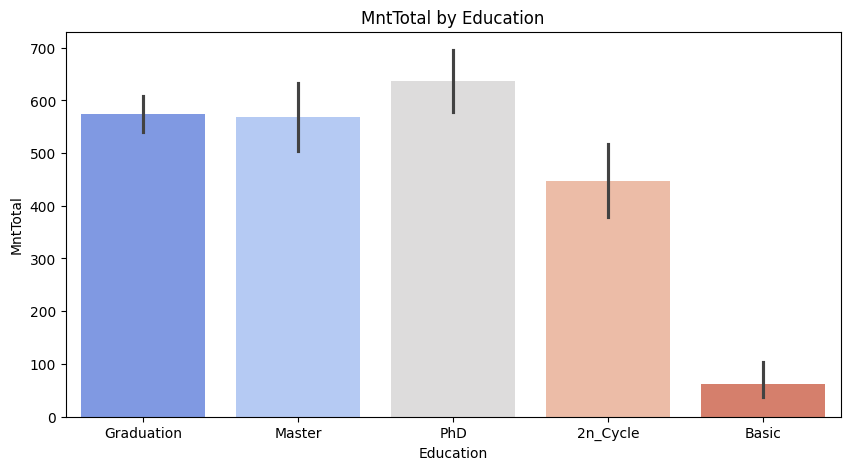

In [232]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Education', y='MntTotal', data=df, palette='coolwarm', estimator = 'mean')
plt.title('MntTotal by Education')
plt.xlabel('Education')
plt.ylabel('MntTotal')
plt.show()

In [233]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
df['Marital'] = df.apply(get_marital_status, axis=1)

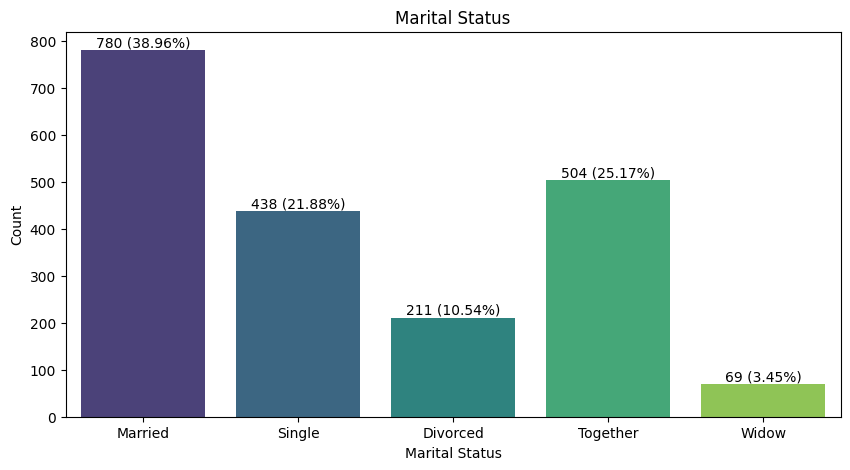

In [234]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Marital', data=df, palette='viridis')

total = len(df)

# Add percentage labels to each bar
for p in ax.patches:
    count = p.get_height() 
    percentage = (count / total) * 100  
    
    # Annotate the percentage label on each bar
    ax.text(p.get_x() + p.get_width() / 2, count + 0.5, f'{count:.0f} ({percentage:.2f}%)', 
            ha='center', va='bottom')

        
plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

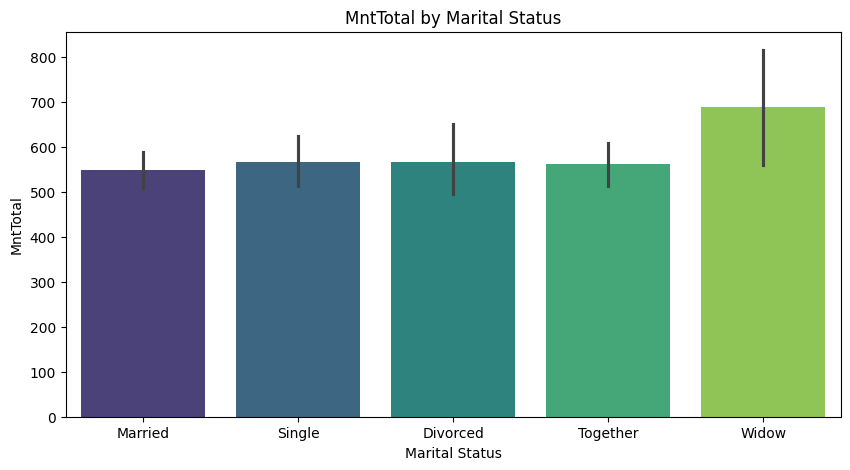

In [235]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Marital', y='MntTotal', data=df, palette='viridis', estimator = 'mean')
plt.title('MntTotal by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('MntTotal')
plt.show()

In [236]:
def get_spender(row):
    if row['MntTotal'] >= 750 :
        return True
    else:
        return False
df['high_spender'] = df.apply(get_spender, axis=1)


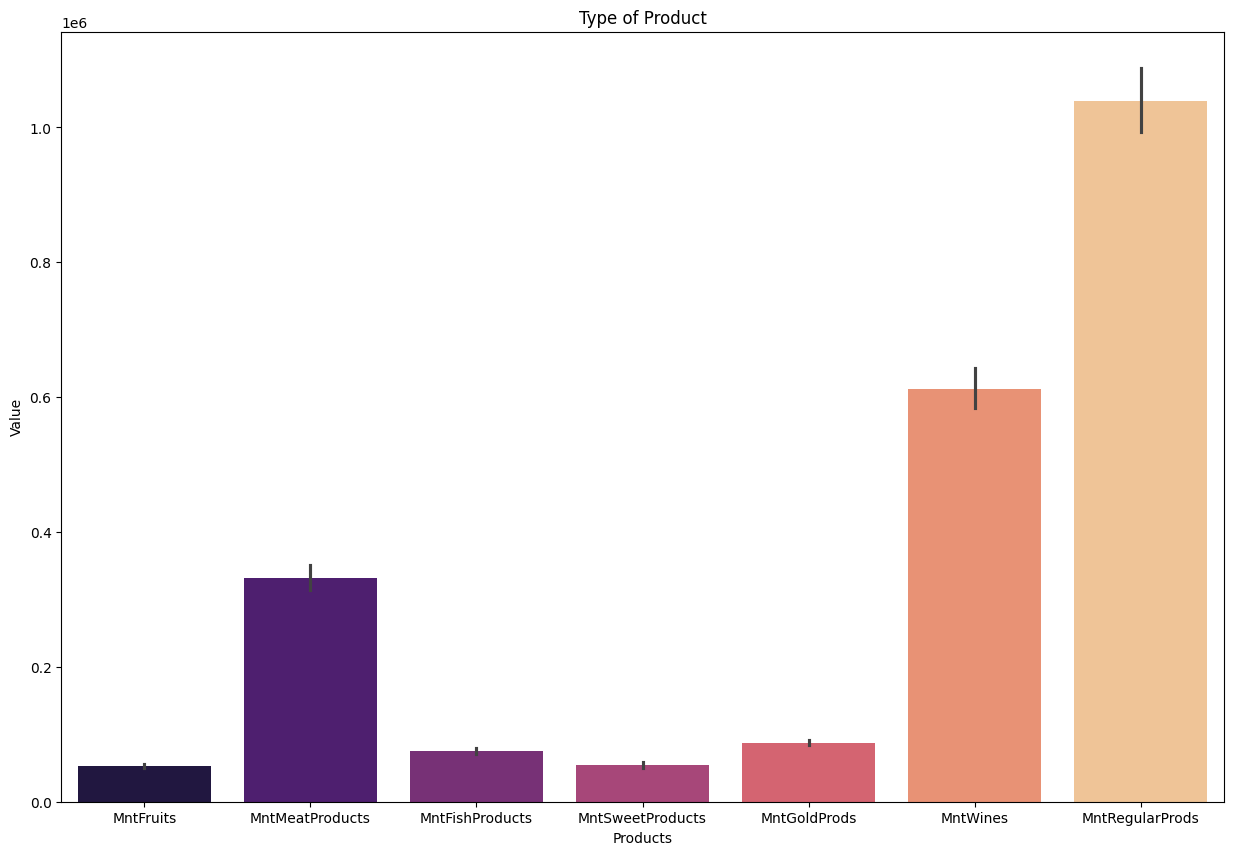

In [237]:
Mnt_Purchases = df[['MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','MntWines','MntRegularProds']]
Mnt_Purchases = Mnt_Purchases.melt(var_name ='Type_of_Product',value_name = 'Value')

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Type_of_Product',y='Value', data=Mnt_Purchases, palette='magma',estimator = 'sum')
        
plt.title('Type of Product')
plt.xlabel('Products')
plt.ylabel('Value')
plt.show()

Campaign Reach

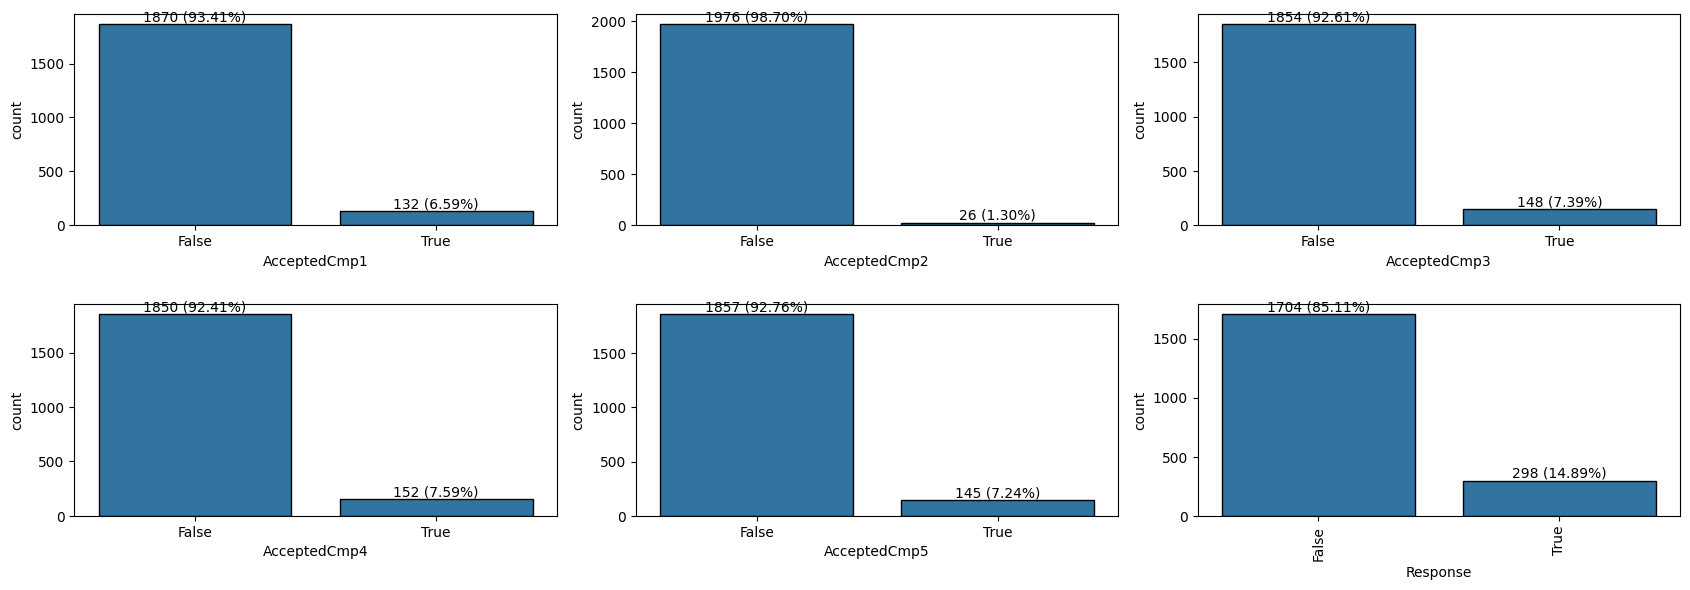

In [238]:
#How many customer accepted the campaign
Campaign =  df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']]

#visualize filtered categorical data
plt.figure(figsize = (17,17))

for i in enumerate(Campaign):
    plt.subplot(6,3,i[0]+1)
    #use hue to filter with one other category
    ax = sns.countplot(x=i[1]
                       
                  #,hue  = 'Gender'
                  ,data = Campaign
                  ,edgecolor='black'
                  )    

    for p in ax.patches:
        total = len(Campaign[i[1]])
        height = p.get_height()

        ax.text(p.get_x() + p.get_width() / 2, 
                p.get_height(),
                f'{height:.0f} ({100 * height / total:.2f}%)' 

                ,ha='center'
                ,va='bottom'
                ,fontsize=10
                ,color='black'
                )
        
plt.xticks(rotation = 90)
#adjust layout
plt.tight_layout()
#Show the plots
plt.show()

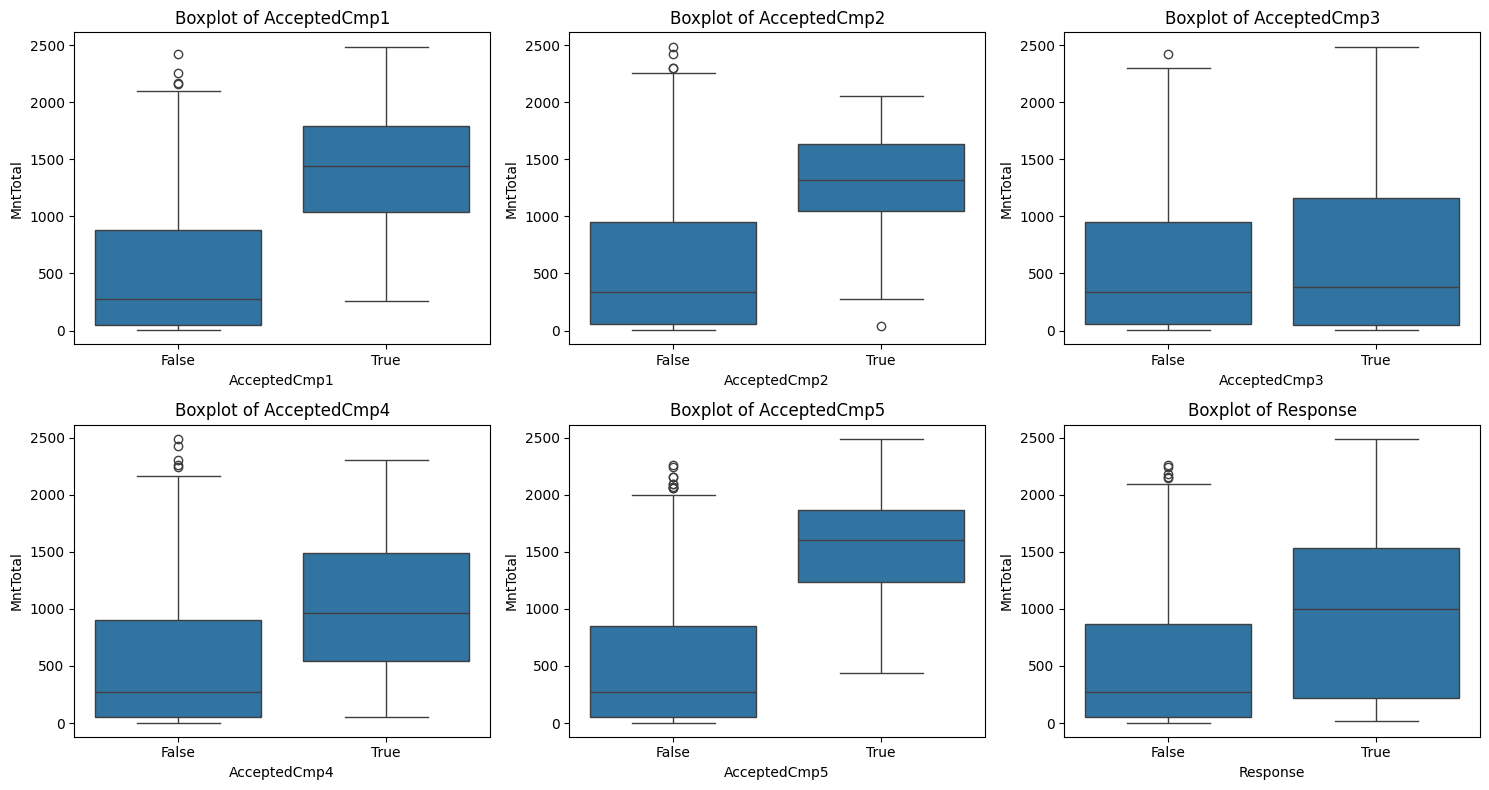

In [239]:
#the difference of spending
Campaign['MntTotal'] = df['MntTotal']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i in enumerate(Campaign):
    if i[0] == 0:
        a = 0
        b = 0
    if b == 2:
        a = 1
    if i[0] >= 0:
        b = i[0] % 3
    sns.boxplot(x=i[1], y='MntTotal'
                #,hue=''
                ,data=Campaign, ax=axes[a, b]) 
    axes[a,b].set_title(f'Boxplot of {i[1]}')
    if i[0] == 5:
        break

plt.tight_layout()
plt.show()

Clustering

In [275]:
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [276]:
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
df['In_relationship'] = df.apply(get_relationship, axis=1)


In [277]:
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal','In_relationship','Age']

data_scaled = df.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(df[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship,Age
count,2.002000e+03,2.002000e+03,2.002000e+03,2.002000e+03
mean,-2.484415e-17,6.388496e-17,-1.295445e-16,-3.194248e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-2.403634e+00,-9.708257e-01,-1.337274e+00,-2.324362e+00
25%,-7.844850e-01,-8.822615e-01,-1.337274e+00,-6.962600e-01
50%,-1.110110e-02,-3.821344e-01,7.477901e-01,-9.643289e-02
75%,8.025545e-01,6.927917e-01,7.477901e-01,8.461526e-01
max,2.990189e+00,3.347980e+00,7.477901e-01,2.474255e+00


In [278]:
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

In [279]:
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

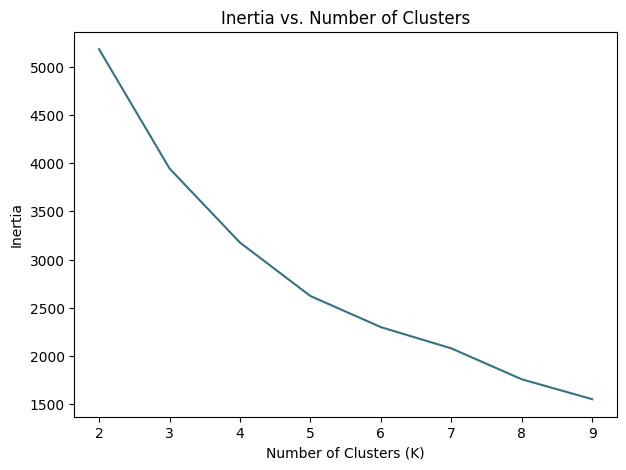

In [280]:
plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))

plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

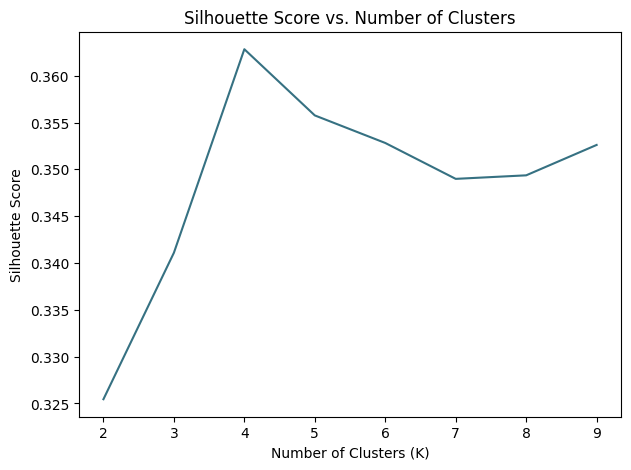

In [281]:
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [282]:
model = KMeans(n_clusters=5, random_state = 5)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

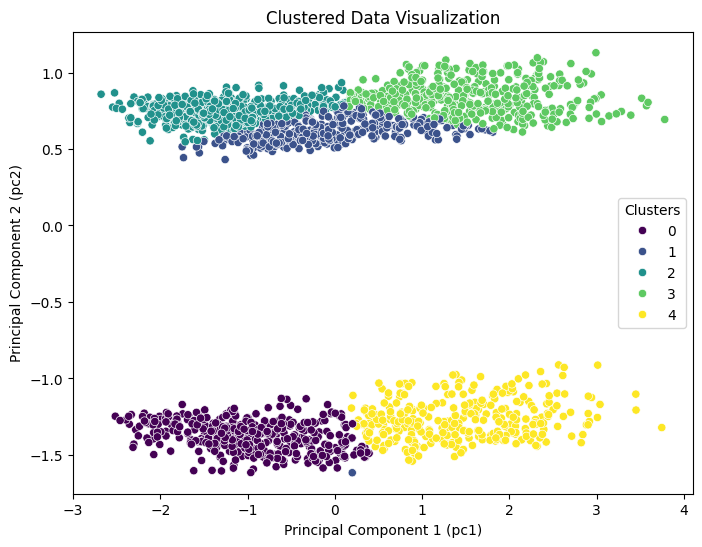

In [283]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [284]:
df['Cluster'] = data_scaled.Cluster
df.groupby('Cluster')[cols_for_clustering].mean()

,Income,MntTotal,In_relationship,Age
Cluster,,,,
0,37024.769608,147.740196,0.000000,49.713235
1,50588.472303,356.548105,0.997085,63.072886
2,34682.794340,138.618868,1.000000,43.218868
3,73704.014563,1251.873786,1.000000,51.021845
4,71784.566343,1150.223301,0.000000,53.427184


In [285]:
mnt_data = df.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

,Cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,147.740196,121.933824,83.235294,8.068627,38.125000,10.786765,7.524510,25.806373
1,1,356.548105,317.749271,224.521866,15.670554,79.618076,21.556851,15.180758,38.798834
2,2,138.618868,115.698113,73.392453,7.205660,38.384906,11.658491,7.977358,22.920755
3,3,1251.873786,1181.012136,664.378641,57.878641,386.235437,82.373786,61.007282,70.861650
4,4,1150.223301,1077.786408,610.375405,53.799353,355.019417,75.883495,55.145631,72.436893


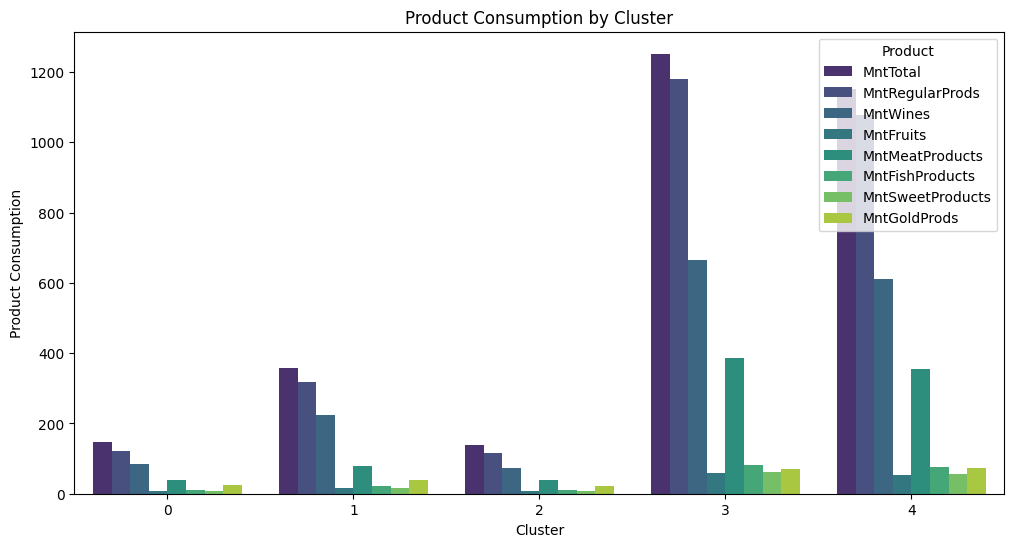

In [286]:
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None
            , palette="viridis"
            ,estimator = 'sum')
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")

plt.show()

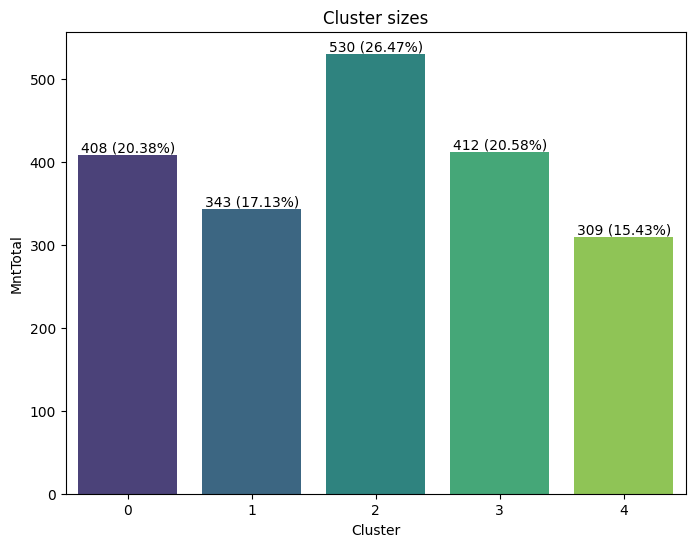

In [287]:
cluster_sizes = df.groupby('Cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(8,6))
ax = sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'viridis')

for p in ax.patches:
        total = len(df)
        height = p.get_height()

        ax.text(p.get_x() + p.get_width() / 2, 
                p.get_height(),
                f'{height:.0f} ({100 * height / total:.2f}%)' 

                ,ha='center'
                ,va='bottom'
                ,fontsize=10
                ,color='black'
                )
        
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')
plt.show()

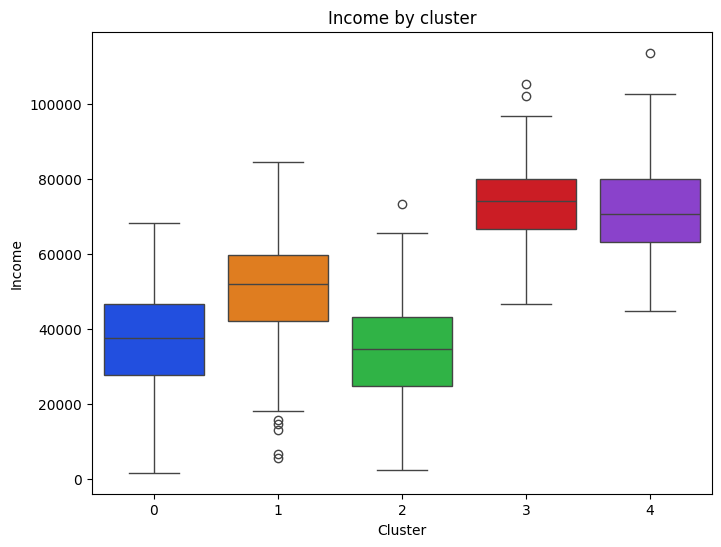

In [302]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=df, palette='bright')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

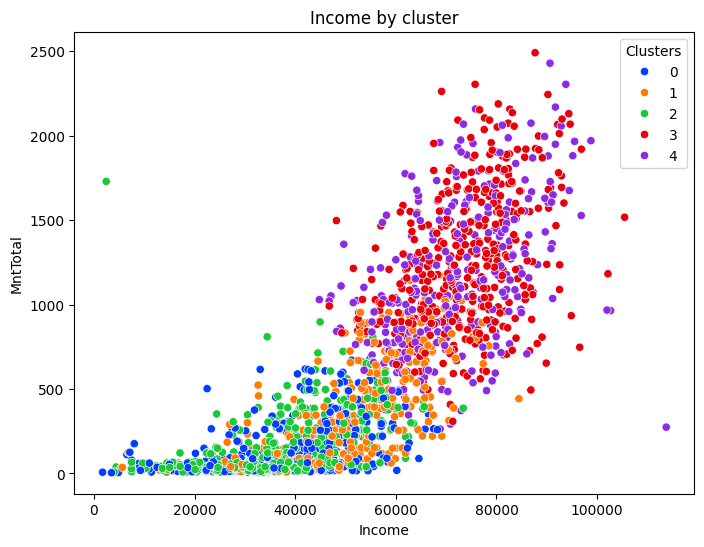

In [301]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=df, hue = 'Cluster', palette='bright')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')
plt.show()

Text(0, 0.5, 'Age')

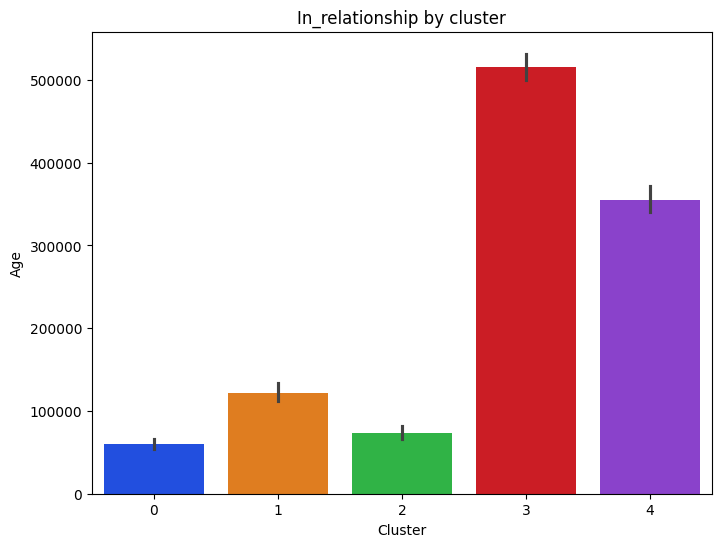

In [303]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='MntTotal', data=df, palette='bright',estimator = 'sum')
        
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')

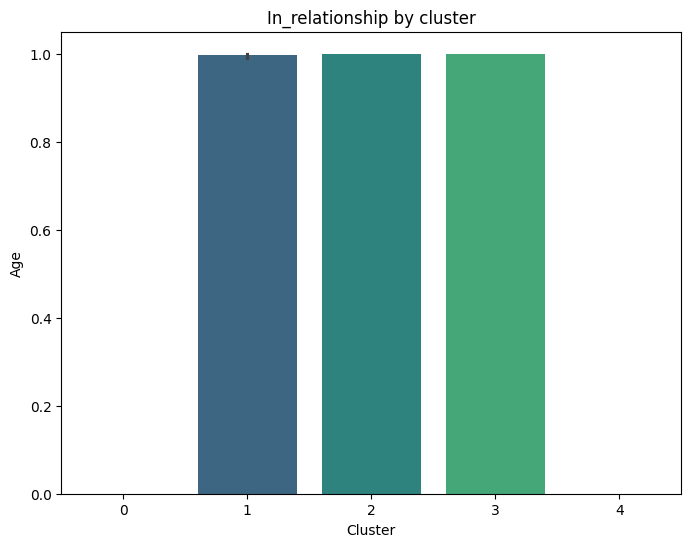

In [291]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='In_relationship', data=df, palette='viridis')
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()